In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [3]:
 #tạo các cột theo các phần phối khác nhau
df = pd.DataFrame({ 
    'beta': np.random.beta(5, 1, 1000) * 60,        # beta
    'exponential': np.random.exponential(10, 1000), # exponential
    'normal_p': np.random.normal(10, 2, 1000),      # normal platykurtic
    'normal_l': np.random.normal(10, 10, 1000),     # normal leptokurtic
})

In [4]:
# thêm dữ liệu được tạo theo phân phối nhị thức
first_half = np.random.normal(20, 3, 500) 
second_half = np.random.normal(-20, 3, 500) 
bimodal = np.concatenate([first_half, second_half])

df['bimodal'] = bimodal
# hiển thị dữ liệu
df.head()

,beta,exponential,normal_p,normal_l,bimodal
0,31.176054,8.457107,11.646042,-9.838396,24.436881
1,46.414911,15.667334,8.424146,4.044323,19.019601
2,47.229025,7.306749,10.016024,-22.066726,18.038914
3,52.259926,7.131653,13.967156,9.722883,22.397769
4,57.069181,5.850444,10.817252,-14.851495,20.516655


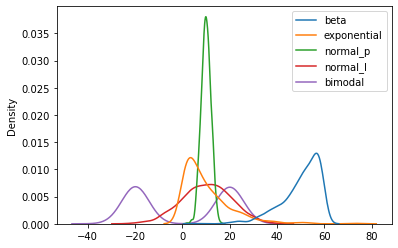

In [5]:
sns.kdeplot(data=df)

In [6]:
df.describe()

,beta,exponential,normal_p,normal_l,bimodal
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,50.258042,10.297707,10.038795,10.251001,0.101084
std,8.170687,10.192958,2.048008,10.284848,20.212761
min,6.766411,0.000306,2.034969,-22.066726,-31.448290
25%,46.082651,2.992079,8.693384,3.330385,-19.821346
50%,52.264570,7.297721,10.034352,10.553865,0.450811
75%,56.644583,14.561211,11.443753,17.505740,20.135403
max,59.998066,74.338380,16.411520,39.249374,28.848634


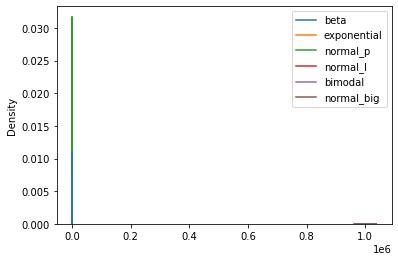

In [7]:
normal_big = np.random.normal(1000000, 10000, (1000,1))  # normal distribution of large values
df['normal_big'] = normal_big
sns.kdeplot(data=df)

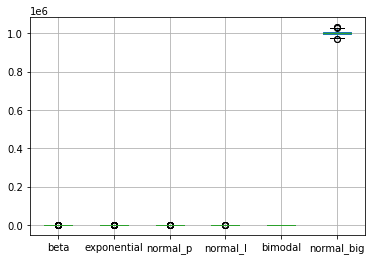

In [8]:
# trực quan hóa bằng biểu đồ box plot
df.boxplot()

In [10]:
# Khai báo đối tượng MinMaxScaler
scaler = MinMaxScaler()

In [11]:
# Chuẩn hóa dữ liệu trong df với StandardScaler
df_s = scaler.fit_transform(df)

# lấy danh sáchc cột
col_names = list(df.columns)

# chuyển về DataFrame, gán các cột của df cho dữ liệu đã được chuẩn hóa
df_s = pd.DataFrame(df_s, columns=col_names)

In [12]:
df_s.head()

,beta,exponential,normal_p,normal_l,bimodal,normal_big
0,0.458555,0.113761,0.668524,0.199431,0.926833,0.900975
1,0.744829,0.210754,0.444417,0.425843,0.836989,0.436766
2,0.760123,0.098287,0.555144,0.000000,0.820725,0.429343
3,0.854633,0.095931,0.829976,0.518455,0.893015,0.798170
4,0.944979,0.078696,0.610876,0.117673,0.861818,0.731663


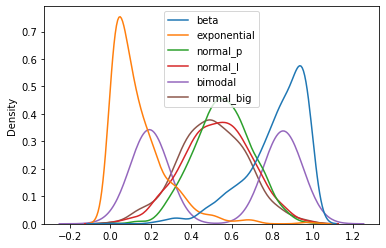

In [13]:
sns.kdeplot(data=df_s)

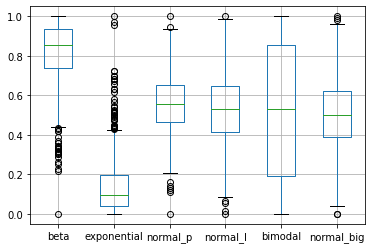

In [14]:
# trực quan hóa bằng biểu đồ box plot
df_s.boxplot()

In [15]:
# thống kê về dữ liệu được sinh ra
df_s.describe()

,beta,exponential,normal_p,normal_l,bimodal,normal_big
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.817026,0.138521,0.556728,0.527068,0.523234,0.505038
std,0.153493,0.137116,0.142455,0.167735,0.335220,0.168926
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.738588,0.040246,0.463144,0.414200,0.192828,0.390067
50%,0.854720,0.098165,0.556419,0.532007,0.529034,0.501853
75%,0.937002,0.195874,0.654454,0.645385,0.855495,0.622322
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [16]:
# lấy giá trị min của cột beta
df_s['beta'].min()

0.0

In [17]:
# lấy giá trị max của cột beta
df_s['beta'].max()

0.9999999999999999

In [18]:
# in các giá trị min của từng cột trong dữ liệu chưa chuẩn hóa
mins = [df[col].min() for col in df.columns]
mins

[6.76641130689639,
 0.00030571121638062074,
 2.0349688312752967,
 -22.06672647003778,
 -31.448290068485303,
 969926.6301915785]

In [19]:
# in các giá trị min của từng cột trong dữ liệu đã chuẩn hóa
mins = [df_s[col].min() for col in df_s.columns]
mins

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [20]:
# in các giá trị max của từng cột dữ liệu chưa chuẩn hóa
maxs = [df[col].max() for col in df.columns]
maxs

[59.998065671878486,
 74.33837998155889,
 16.41151950017229,
 39.249374442834494,
 28.848633752929345,
 1030258.1954095786]

In [21]:
# in các giá trị max của từng cột dữ liệu đã chuẩn hóa
maxs = [df_s[col].max() for col in df_s.columns]
maxs

[0.9999999999999999, 1.0, 1.0, 1.0, 0.9999999999999999, 1.0]